# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

In [17]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [18]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]

                                                #########################
                                                ##### MY WORK START #####
                                                #########################
    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        
    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Determine the potential directions the agent may "slip" based on the original action
        poss_slip_dirs = ["LEFT", "RIGHT"] if act in ["UP", "DOWN"] else ["UP", "DOWN"]

        # Determine if slipping
        if random.random() < 0.8:
            # If the random float is less than 0.8 (80% of the time), there is no slipping and the original action 
                # will not change
            next_state = self.take_action(state, act)
        else:
            # If the random float is >= 0.8 (20% of the time), a random int (0 or 1) is created to determine which 
                # direction the agent slipped based on the possible directions identified above in poss_slip_dirs, 
                # resulting in a 10% likelyhood the agent slips in either perpendicular direction
            next_state = self.take_action(state, poss_slip_dirs[random.randint(0,1)])
        
        # The only time reward is equal to 1 is when we reach [10, 10], otherwise it's 0
        reward = 1 if next_state == [10, 10] else 0

        return next_state, reward
        
                                                #######################
                                                ##### MY WORK END #####
                                                #######################
        
    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [19]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [ ]:
                                                #########################
                                                ##### MY WORK START #####
                                                #########################
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step
    time_step = 100

    # Main loop
    for t in range(time_step):
        # Action input
        action = input("Enter an action (\"UP\", \"DOWN\", \"LEFT\" or \"RIGHT\"): ")
        
        # Create a while loop in case I type in the wrong word
        while action not in ["UP", "DOWN", "LEFT", "RIGHT"]:
            action = input(f"[INPUT]: \"{action}\" not a valid action. Please enter \"UP\", \"DOWN\", \"LEFT\" or \"RIGHT\": ")
        
        # Pass the current state and new action in to the step function
        next_state, reward = env.step(state, action)
        
                                                #######################
                                                ##### MY WORK END #####
                                                #######################
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

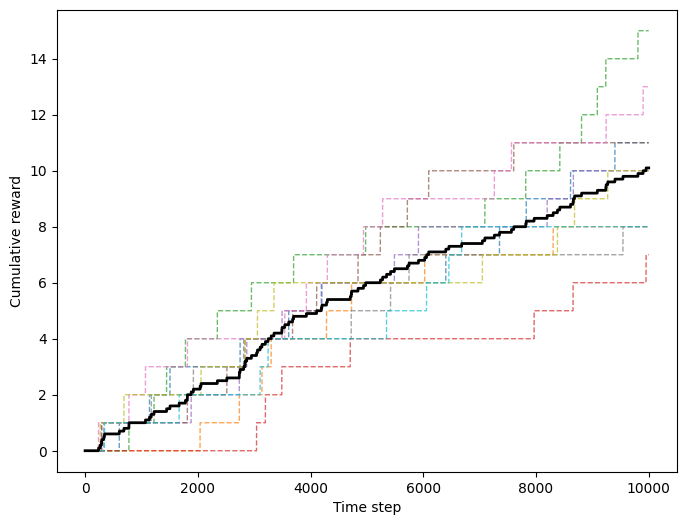

In [21]:
                                                #########################
                                                ##### MY WORK START #####
                                                #########################
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create Env
    env = FourRooms()

    # number of trials
    trial_num = 10   
    # length of each trial
    trial_length = int(1e4)
    
    # Initialize rewards for plot
    rewards_list = []
    
    # List of possible actions
    actions = ["UP", "DOWN", "LEFT", "RIGHT"]
    
    # Main loop
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # Initialize rewards
        reward_per_trial = []
        reward_counter = 0
    
        # reset 
        state, reward = env.reset()
        
        # Loop for each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):            
            # Select a random index of the list by creating a random interger 0, 1, 2 or 3
            action = actions[random.randint(0,3)]
                       
            # Pass the current state and new action in to the step function
            next_state, reward = env.step(state, action)
        
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)
                                                #######################
                                                ##### MY WORK END #####
                                                #######################

# 4 Implement better & worse policies against the Random Policy

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

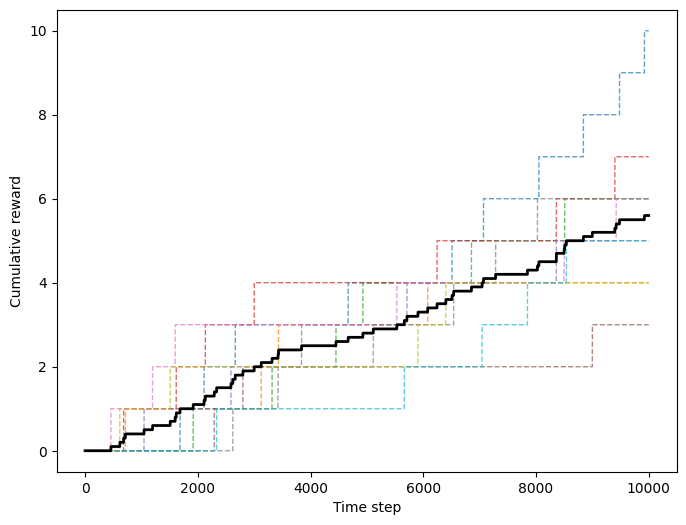

In [22]:
                                                #########################
                                                ##### MY WORK START #####
                                                #########################
# WORSE POLICY
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create Env
    env = FourRooms()

    # number of trials
    trial_num = 10   
    # length of each trial
    trial_length = int(1e4)
    
    # Initialize rewards for plot
    rewards_list = []
    
    # List of possible actions
    actions = ["UP", "DOWN", "LEFT", "RIGHT"]
    
    # Main loop
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # Loop for each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            # Select a random index of the list by creating a random interger 0, 1, 2 or 3
            action = actions[random.randint(0,3)]
            if t == 0:
                last_action = ""
                
            # While loop that picks a new random action if the actions were consecutive. This loop makes
                # it so there wont be 2 of the same actions in a row, ex. UP then another UP
            while last_action == action:
                action = actions[random.randint(0,3)]
            last_action = action
            
            # Pass the current state and new action in to the step function
            next_state, reward = env.step(state, action)
            
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)
                                                #######################
                                                ##### MY WORK END #####
                                                #######################

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

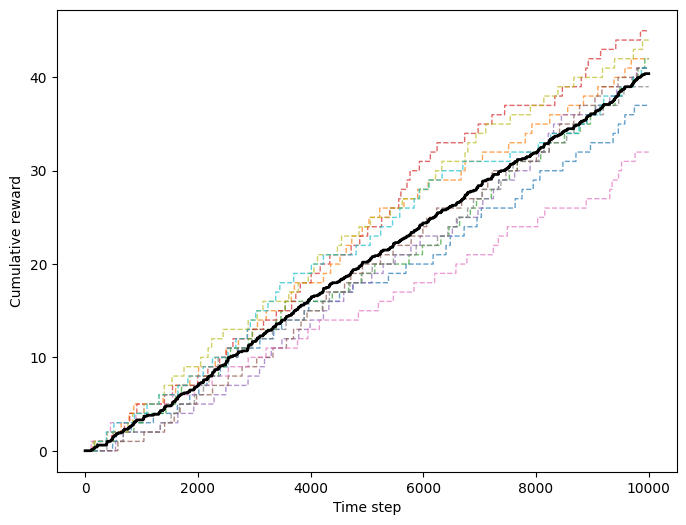

In [23]:
                                                #########################
                                                ##### MY WORK START #####
                                                #########################
# BETTER POLICY
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create Env
    env = FourRooms()

    # number of trials
    trial_num = 10   
    # length of each trial
    trial_length = int(1e4)
    
    # Initialize rewards for plot
    rewards_list = []
    
#     # List of possible actions
#     actions = ["UP", "DOWN", "LEFT", "RIGHT"]
    
    # Main loop
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):

        # reset for every trial
        reward_per_trial = []
        reward_counter = 0

        # reset the environment
        state, reward = env.reset()

        # Loop for each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            # Create a random float between 0 and 1. If it is less than 0.7 (70% of the time), the action
                # will be either UP or RIGHT. Otherwise (30% of the time), it will be DOWN or LEFT
            actions = ["UP", "RIGHT"] if random.random() < 0.7 else ["DOWN", "LEFT"]
                
            # Based on the 2 actions selected above, pick a random one
            action = actions[random.randint(0,1)]  

            # Pass the current state and new action in to the step function
            next_state, reward = env.step(state, action)

            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)

            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)

# PLOT THE RESULTS
plot_func(rewards_list)

                                                #######################
                                                ##### MY WORK END #####
                                                #######################